In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## description of the rows

* DateTime: String, defines date and time of sample
* Holiday: String, gives name of holiday if day is a bank holiday
* HolidayFlag: integer, 1 if day is a bank holiday, zero otherwise
* DayOfWeek: integer (0-6), 0 monday, day of week
* WeekOfYear: integer, running week within year of this date
* Day integer: day of the date
* Month integer: month of the date
* Year: integer year of the date
* PeriodOfDay: integer denotes half hour period of day (0-47)
* ForecastWindProduction: the forecasted wind production for this period
* SystemLoadEA: the national load forecast for this period
* SMPEA: the price forecast for this period
* ORKTemperature: the actual temperature measured at Cork airport
* ORKWindspeed: the actual windspeed measured at Cork airport
* CO2Intensity: the actual CO2 intensity in (g/kWh) for the electricity produced
* ActualWindProduction: the actual wind energy production for this period
* SystemLoadEP2: the actual national system load for this period
* SMPEP2: the actual price of this time period, the value to be forecasted.


In [2]:
data = pd.read_csv("E:/new/new_one/electricity_prices.csv")

E:\new\new_one\env\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [4]:
len(data)

38014

In [5]:
#create a function to view the data

def Missing_values(data):
    # create list
    variable_name =[]
    total_value = []
    total_missing_value = []
    missing_value_rate =[]
    unique_value_list = []
    total_unique_value =[]
    data_type = []
    
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0], 3))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data = pd.DataFrame({'variable': variable_name,
                                'total value': total_value,
                                'total missing value': total_missing_value,
                                'missing_value_rate': missing_value_rate,
                                'unique_value_list': unique_value_list,
                                'total_unique_value': total_unique_value,
                                'data_type': data_type})
    return missing_data.sort_values('missing_value_rate', ascending=False)

In [6]:
Missing_values(data)

,variable,total value,total missing value,missing_value_rate,unique_value_list,total_unique_value,data_type
0,DateTime,38014,0,0.0,"[01/11/2011 00:00, 01/11/2011 00:30, 01/11/201...",38014,object
1,Holiday,38014,0,0.0,"[None, Christmas Eve, Christmas, St Stephen's ...",15,object
16,SystemLoadEP2,38014,0,0.0,"[3159.60, 2973.01, 2834.00, 2725.99, 2655.64, ...",36171,object
15,ActualWindProduction,38014,0,0.0,"[356.00, 317.00, 311.00, 313.00, 346.00, 342.0...",2940,object
14,CO2Intensity,38014,0,0.0,"[600.71, 605.42, 589.97, 585.94, 571.52, 562.6...",25115,object
13,ORKWindspeed,38014,0,0.0,"[9.30, 11.10, 7.40, 5.60, 3.70, ?, 13.00, 22.2...",53,object
12,ORKTemperature,38014,0,0.0,"[6.00, 5.00, 4.00, 8.00, 9.00, ?, 11.00, 12.00...",32,object
11,SMPEA,38014,0,0.0,"[49.26, 49.10, 48.04, 33.75, 47.42, 44.31, 45....",8661,object
10,SystemLoadEA,38014,0,0.0,"[3388.77, 3196.66, 3060.71, 2945.56, 2849.34, ...",36166,object
9,ForecastWindProduction,38014,0,0.0,"[315.31, 321.80, 328.57, 335.60, 342.90, 342.9...",29312,object


In [7]:
# see the unique value
data['Holiday'].unique()

array(['None', 'Christmas Eve', 'Christmas', "St Stephen's Day",
       "New Year's Eve", "New Year's Day", "St Patrick's Day",
       'Good Friday', 'Holy Saturday', 'Easter', 'Easter Monday',
       'May Day', 'June Bank Holiday', 'August Bank Holiday',
       'October Bank Holiday'], dtype=object)

In [8]:
data['HolidayFlag'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Holiday'>

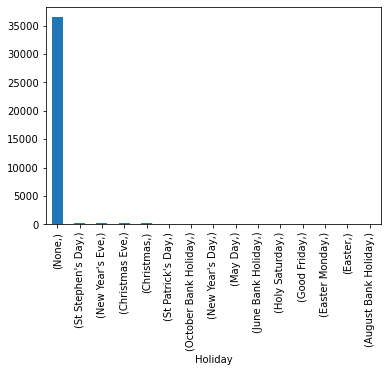

In [9]:
data.value_counts(['Holiday']).plot(kind='bar')

In [10]:
data.value_counts(['HolidayFlag'])

HolidayFlag
0              36478
1               1536
dtype: int64

<AxesSubplot:xlabel='HolidayFlag'>

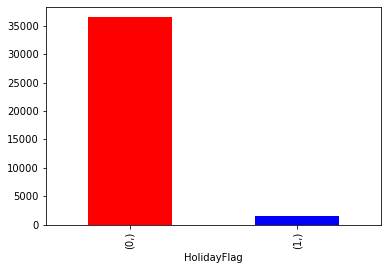

In [11]:
data.value_counts(['HolidayFlag']).plot(kind='bar', color=['red', 'blue'])

<AxesSubplot:xlabel='PeriodOfDay'>

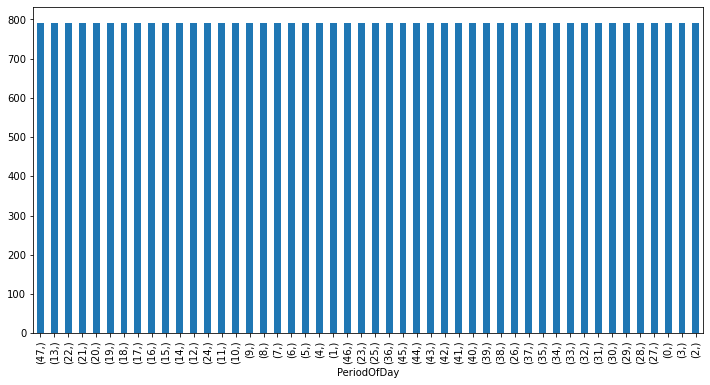

In [12]:
data.value_counts(['PeriodOfDay']).plot(kind='bar', figsize=(12, 6))

In [13]:
def_tmp = data.copy()

In [14]:
# These columns contain strings
for label, content in def_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

DateTime
Holiday
ForecastWindProduction
SystemLoadEA
SMPEA
ORKTemperature
ORKWindspeed
CO2Intensity
ActualWindProduction
SystemLoadEP2
SMPEP2


In [15]:
# This will turn all of the string values into category values
for label, content in def_tmp.items():
    if pd.api.types.is_string_dtype(content):
        def_tmp[label] = content.astype("category").cat.as_ordered()

In [16]:
# This will turn all of the string values into category values
for label, content in def_tmp.items():
    if pd.api.types.is_string_dtype(content):
        def_tmp[label] = content.astype("category").cat.as_ordered()

In [17]:
Missing_values(def_tmp)

,variable,total value,total missing value,missing_value_rate,unique_value_list,total_unique_value,data_type
0,DateTime,38014,0,0.0,"['01/11/2011 00:00', '01/11/2011 00:30', '01/1...",38014,category
1,Holiday,38014,0,0.0,"['None', 'Christmas Eve', 'Christmas', 'St Ste...",15,category
16,SystemLoadEP2,38014,0,0.0,"['3159.60', '2973.01', '2834.00', '2725.99', '...",36171,category
15,ActualWindProduction,38014,0,0.0,"['356.00', '317.00', '311.00', '313.00', '346....",2940,category
14,CO2Intensity,38014,0,0.0,"['600.71', '605.42', '589.97', '585.94', '571....",25115,category
13,ORKWindspeed,38014,0,0.0,"['9.30', '11.10', '7.40', '5.60', '3.70', ...,...",53,category
12,ORKTemperature,38014,0,0.0,"['6.00', '5.00', '4.00', '8.00', '9.00', ..., ...",32,category
11,SMPEA,38014,0,0.0,"['49.26', '49.10', '48.04', '33.75', '47.42', ...",8661,category
10,SystemLoadEA,38014,0,0.0,"['3388.77', '3196.66', '3060.71', '2945.56', '...",36166,category
9,ForecastWindProduction,38014,0,0.0,"['315.31', '321.80', '328.57', '335.60', '342....",29312,category


In [18]:
# Check columns which *aren't* numeric
for label, content in def_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

DateTime
Holiday
ForecastWindProduction
SystemLoadEA
SMPEA
ORKTemperature
ORKWindspeed
CO2Intensity
ActualWindProduction
SystemLoadEP2
SMPEP2


In [19]:
# Turn categorical variables into numbers
for label, content in def_tmp.items():
    # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
    # We add the +1 because pandas encodes missing categories as -1
        def_tmp[label] = pd.Categorical(content).codes+1

In [20]:
# Check columns which *aren't* numeric again
for label, content in def_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

In [21]:
Missing_values(def_tmp)

,variable,total value,total missing value,missing_value_rate,unique_value_list,total_unique_value,data_type
0,DateTime,38014,0,0.0,"[961, 962, 963, 964, 965, 966, 967, 968, 969, ...",38014,int32
1,Holiday,38014,0,0.0,"[12, 3, 2, 15, 11, 10, 14, 6, 7, 4, 5, 9, 8, 1...",15,int8
16,SystemLoadEP2,38014,0,0.0,"[13871, 12121, 10717, 9608, 8927, 8248, 8012, ...",36171,int32
15,ActualWindProduction,38014,0,0.0,"[2226, 2183, 2177, 2179, 2215, 2211, 2204, 220...",2940,int16
14,CO2Intensity,38014,0,0.0,"[22770, 22981, 22240, 22025, 21164, 20597, 193...",25115,int16
13,ORKWindspeed,38014,0,0.0,"[52, 4, 47, 34, 21, 53, 5, 13, 10, 11, 14, 16,...",53,int8
12,ORKTemperature,38014,0,0.0,"[28, 27, 26, 30, 31, 32, 9, 10, 11, 8, 29, 25,...",32,int8
11,SMPEA,38014,0,0.0,"[4931, 4915, 4812, 3552, 4745, 4435, 4518, 463...",8661,int16
10,SystemLoadEA,38014,0,0.0,"[13942, 12114, 10721, 9606, 8701, 8385, 8155, ...",36166,int32
9,ForecastWindProduction,38014,0,0.0,"[16208, 16366, 16529, 16706, 16898, 16900, 169...",29312,int16


In [22]:
def_tmp.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,961,12,0,1,44,1,11,2011,0,16208,13942,4931,28,52,22770,2226,13871,5965
1,962,12,0,1,44,1,11,2011,1,16366,12114,4931,28,4,22981,2183,12121,5956
2,963,12,0,1,44,1,11,2011,2,16529,10721,4915,27,4,22240,2177,10717,5956
3,964,12,0,1,44,1,11,2011,3,16706,9606,4812,28,52,22025,2179,9608,5881
4,965,12,0,1,44,1,11,2011,4,16898,8701,3552,28,4,21164,2215,8927,4542


E:\new\new_one\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


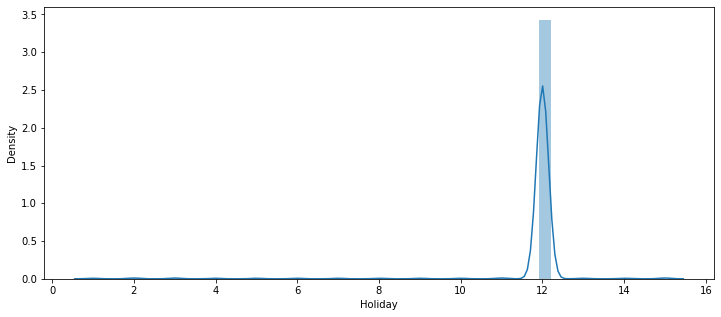

In [23]:
import seaborn as sns
plt.figure(figsize = (12, 5))
sns.distplot(def_tmp['Holiday'])
plt.show()

E:\new\new_one\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


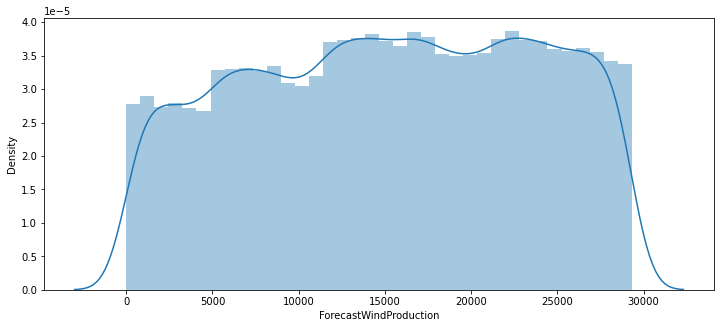

In [24]:
plt.figure(figsize = (12, 5))
sns.distplot(def_tmp['ForecastWindProduction'])
plt.show()

E:\new\new_one\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


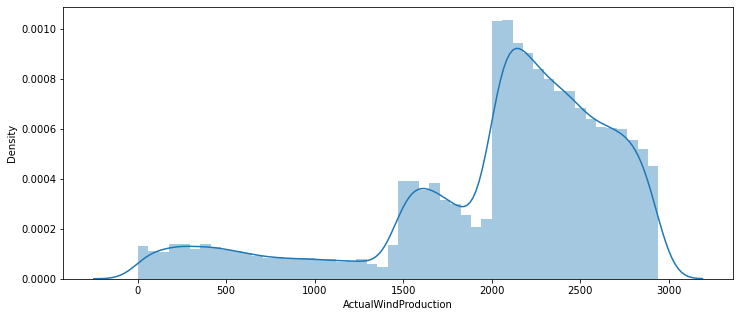

In [25]:
plt.figure(figsize = (12, 5))
sns.distplot(def_tmp['ActualWindProduction'])
plt.show()

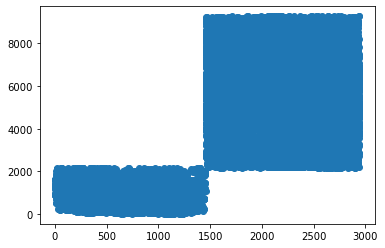

In [26]:
fig, ax = plt.subplots()
ax.scatter(def_tmp['ActualWindProduction'], def_tmp['SMPEP2'])

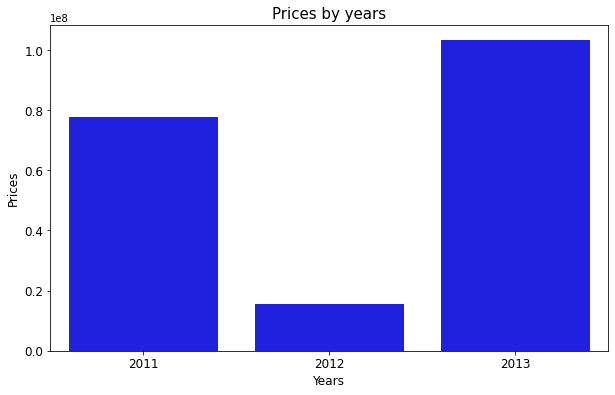

In [27]:
a = def_tmp.groupby("Year").sum()["SMPEP2"]
b = def_tmp["Year"].value_counts().index
plt.figure(figsize = (10,6))
sns.barplot(x = b, y = a, color = "blue", ci = None)
plt.title("Prices by years", fontsize = 15)
plt.tick_params(axis = "both", which = "major", labelsize = 12, direction = "out")
plt.xlabel("Years",fontsize = 12)
plt.ylabel("Prices", fontsize = 12)
plt.show()

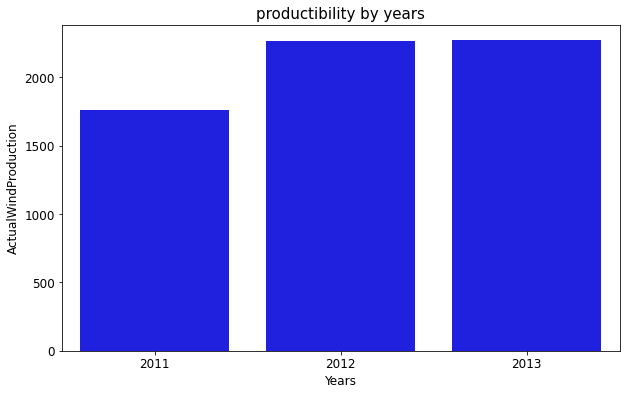

In [28]:
a = def_tmp.groupby("Year").mean()["ActualWindProduction"]
b = def_tmp["Year"].value_counts().index
plt.figure(figsize = (10,6))
sns.barplot(x = b, y = a, color = "blue", ci = None)
plt.title("productibility by years", fontsize = 15)
plt.tick_params(axis = "both", which = "major", labelsize = 12, direction = "out")
plt.xlabel("Years",fontsize = 12)
plt.ylabel("ActualWindProduction", fontsize = 12)
plt.show()

E:\new\new_one\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


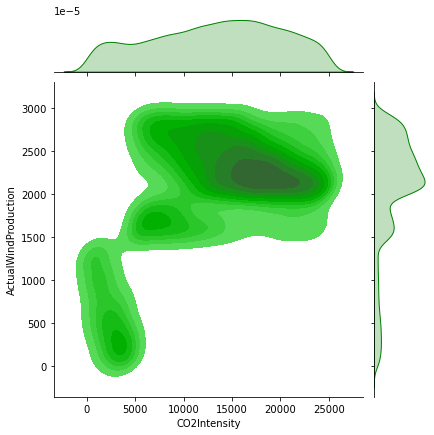

In [29]:
sns.jointplot('CO2Intensity','ActualWindProduction', data=def_tmp,
              kind="kde", fill=True, color='green', height=6);

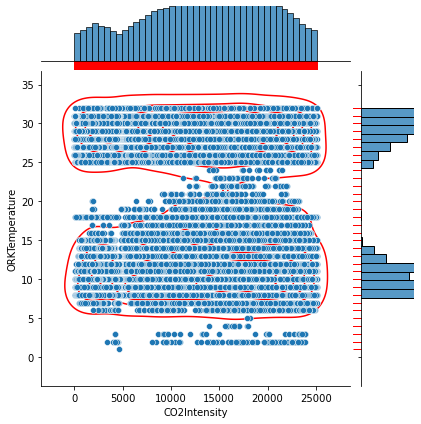

In [30]:
g = sns.jointplot(data=def_tmp, x="CO2Intensity", y="ORKTemperature")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

E:\new\new_one\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


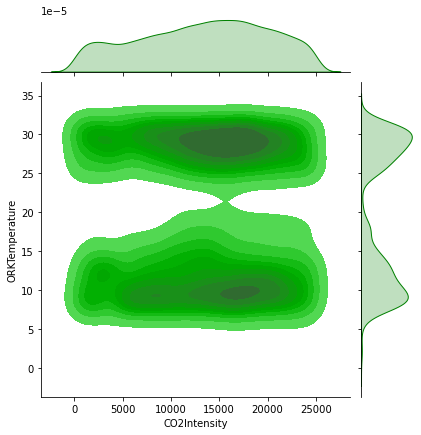

In [31]:
sns.jointplot('CO2Intensity','ORKTemperature', data=def_tmp,
              kind="kde", fill=True,
              color='green', height=6);

In [32]:
#built a function to visulize and compare the data
def plot_fourChart(df, feature1, feature2):
    """
    plot a heatmap to compare the parameters with the actual productivity of energy
    """
    sns.jointplot(df.loc[:,feature1], df.loc[:,feature2], data=df,
              kind="kde", fill=True,
              color='blue', height=6)
    pass

E:\new\new_one\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


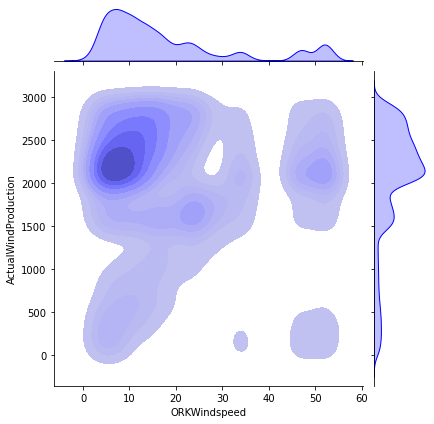

In [33]:
plot_fourChart(def_tmp, 'ORKWindspeed', 'ActualWindProduction')

the function work good.
now let's try it in a four chart and give it a good visualisation

E:\new\new_one\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


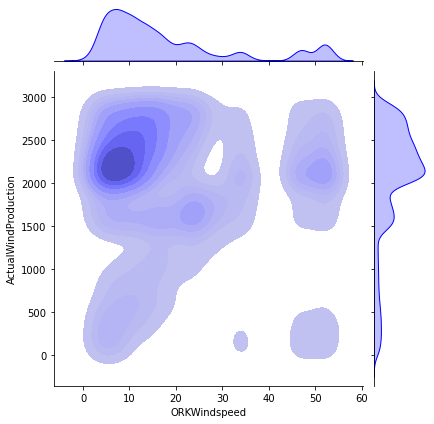

In [34]:
sns.jointplot('ORKWindspeed','ActualWindProduction', data=def_tmp,
              kind="kde", fill=True,
              color='blue', height=6);

In [35]:
# split the data by date
df11 = def_tmp[def_tmp.Year == 2011] #test data
df12 = def_tmp[def_tmp.Year == 2012] #trainig data
df13 = def_tmp[def_tmp.Year == 2013] #valid data
len(df11), len(df12), len(df13)
df11_tmp = df11.copy()
df12_tmp = df12.copy()
df13_tmp = df13.copy()

In [36]:
len(df11), len(df12), len(df13)


(2928, 17566, 17520)

In [37]:
df13.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
20494,49,10,1,1,1,1,1,2013,0,29077,18320,4955,26,7,7759,2750,16485,5304
20495,50,10,1,1,1,1,1,2013,1,28912,16802,4922,18,7,7308,2723,15484,5374
20496,51,10,1,1,1,1,1,2013,2,28860,15402,4924,26,8,7826,2669,14418,5304
20497,52,10,1,1,1,1,1,2013,3,29054,14025,3782,26,10,8285,2640,13213,5304
20498,53,10,1,1,1,1,1,2013,4,29190,12634,3782,26,8,8512,2651,11814,5374


In [38]:
FirstPerdDay0 = df11[df11.PeriodOfDay == 0]

In [39]:
FirstPerdDay0

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,961,12,0,1,44,1,11,2011,0,16208,13942,4931,28,52,22770,2226,13871,5965
48,2209,12,0,2,44,2,11,2011,0,9132,15669,4451,10,32,6602,1855,11778,5681
96,3457,12,0,3,44,3,11,2011,0,7973,16160,5413,10,24,7310,1739,14582,5267
144,4705,12,0,4,44,4,11,2011,0,28249,16789,5238,30,34,23598,2006,16559,5066
192,5953,12,0,5,44,5,11,2011,0,26670,17900,4672,28,5,23178,2807,18523,5642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,33551,12,0,1,52,27,12,2011,0,20864,20430,1936,31,17,7743,2509,15421,8647
2736,34799,12,0,2,52,28,12,2011,0,9413,20416,4620,29,14,5880,1677,14487,4939
2784,35999,12,0,3,52,29,12,2011,0,6946,21723,4728,26,13,5395,1773,14829,4939
2832,37151,12,0,4,52,30,12,2011,0,21702,20982,4456,31,10,7955,2758,16531,7656


E:\new\new_one\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


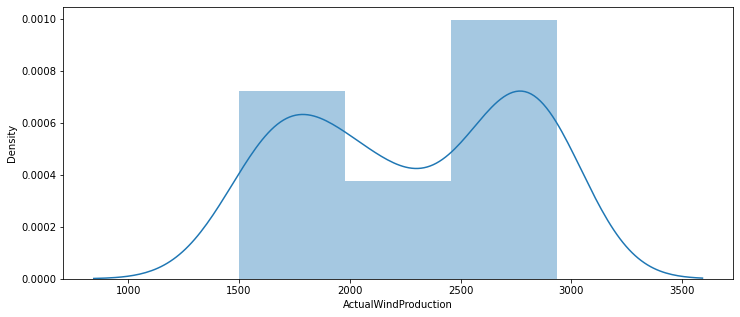

In [40]:
plt.figure(figsize = (12, 5))
sns.distplot(FirstPerdDay0['ActualWindProduction'])
plt.show()

In [41]:
# let's try the midlle periode in the day
FirstPerdDay24 = df11[df11.PeriodOfDay == 24]
FirstPerdDay24

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
24,985,12,0,1,44,1,11,2011,24,25037,32088,6229,9,13,17285,2401,29527,6337
72,2233,12,0,2,44,2,11,2011,24,8689,31945,6753,11,33,12623,1821,29446,6267
120,3481,12,0,3,44,3,11,2011,24,25417,31208,5332,11,14,15212,2725,30514,5066
168,4729,12,0,4,44,4,11,2011,24,8773,31123,5085,9,52,21755,2017,32119,5173
216,5977,12,0,5,44,5,11,2011,24,12259,25837,4834,31,10,21029,2485,27939,6369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,33575,12,0,1,52,27,12,2011,24,7357,21956,6199,31,17,6633,1496,17685,6753
2760,34823,12,0,2,52,28,12,2011,24,9254,28029,4456,27,16,6309,1660,23285,5591
2808,36023,12,0,3,52,29,12,2011,24,7420,27927,4456,31,26,6098,1916,23247,4980
2856,37175,12,0,4,52,30,12,2011,24,6266,28553,5377,9,13,10740,2834,27881,5854


E:\new\new_one\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


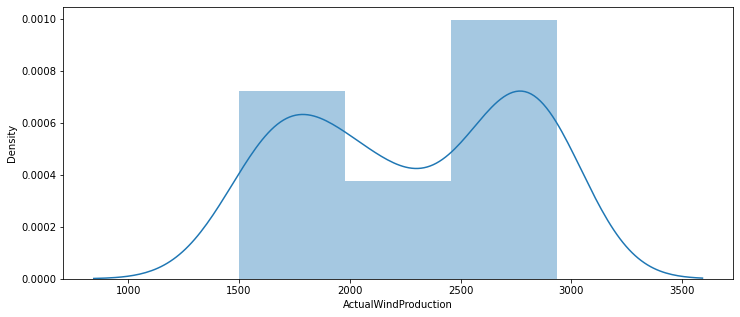

In [42]:
plt.figure(figsize = (12, 5))
sns.distplot(FirstPerdDay0['ActualWindProduction'])
plt.show()

Now let's try to compare the forcasted and the actual data in **2011**
wer're gonna need four plot to visualizethe diffrent.

In [43]:
#Wind Production
col1= ['ForecastWindProduction', 'ActualWindProduction']
df11_tmp1 = df11[col1]
df11_tmp1

,ForecastWindProduction,ActualWindProduction
0,16208,2226
1,16366,2183
2,16529,2177
3,16706,2179
4,16898,2215
...,...,...
2923,7692,1652
2924,7713,1728
2925,7603,1771
2926,7179,1768


In [44]:
# the  national system load
col2  = ['SystemLoadEA', 'SystemLoadEP2']
df11_tmp2 = df11[col2]
df11_tmp2

,SystemLoadEA,SystemLoadEP2
0,13942,13871
1,12114,12121
2,10721,10717
3,9606,9608
4,8701,8927
...,...,...
2923,21514,18185
2924,20518,16790
2925,19831,16264
2926,20341,17107


In [45]:
#The price
col3  = ['SMPEA', 'SMPEP2']
df11_tmp3 = df11[col3]
df11_tmp3

,SMPEA,SMPEP2
0,4931,5965
1,4931,5956
2,4915,5956
3,4812,5881
4,3552,4542
...,...,...
2923,5887,5369
2924,5887,5092
2925,5887,5092
2926,5887,5092


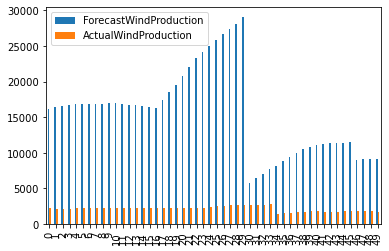

In [46]:
df11_tmp1[:50].plot.bar();

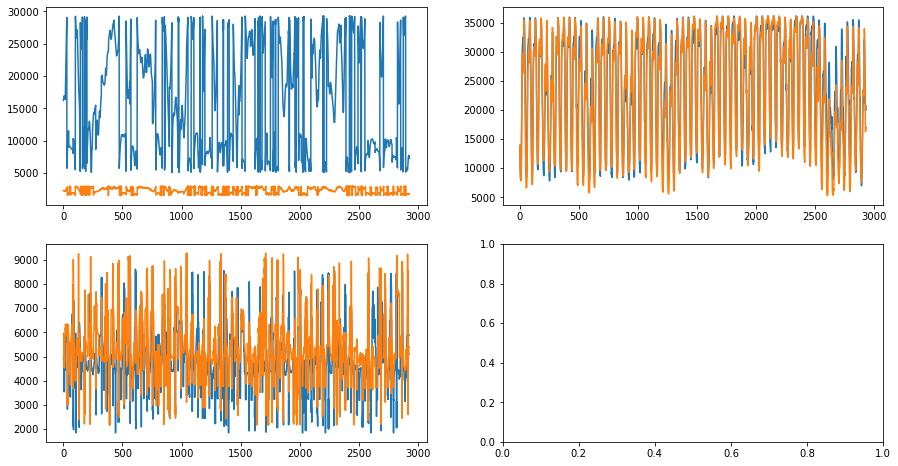

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

# Index to plot data
ax[0, 0].plot(df11_tmp1); #wind production
ax[0, 1].plot(df11_tmp2); # the  national system load
ax[1, 0].plot(df11_tmp3); # the price

we can clearly say that the forcasted wind production is far beyond the reel mesured, in constrat with that the price and the national sys prediction is close than the real mesured

**split the data into train, validation and test sets**

In [48]:
df_train = df12
df_val = df13
df_test = df11.drop('SMPEP2', axis=1)

In [49]:
# Split data into X & y
X_train, y_train = df_train.drop("SMPEP2", axis=1), df_train.SMPEP2
X_valid, y_valid = df_val.drop("SMPEP2", axis=1), df_val.SMPEP2

In [50]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((17566, 17), (17566,), (17520, 17), (17520,))

In [51]:
df_train.shape, df_val.shape, df_test.shape

((17566, 18), (17520, 18), (2928, 17))

In [52]:
df_test.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2
0,961,12,0,1,44,1,11,2011,0,16208,13942,4931,28,52,22770,2226,13871
1,962,12,0,1,44,1,11,2011,1,16366,12114,4931,28,4,22981,2183,12121
2,963,12,0,1,44,1,11,2011,2,16529,10721,4915,27,4,22240,2177,10717
3,964,12,0,1,44,1,11,2011,3,16706,9606,4812,28,52,22025,2179,9608
4,965,12,0,1,44,1,11,2011,4,16898,8701,3552,28,4,21164,2215,8927


Now all of our data is splited and numeric and there are no missing values, we should be able to build a machine learning model!

## RandomForestRegressor

we'll choose RandomForestRegressor model to predict

In [53]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)

In [54]:
%%time
model.fit(X_train ,y_train)

Wall time: 15.6 s


RandomForestRegressor(n_jobs=-1)

In [55]:
#create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

#create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
             'Valid MAE': mean_absolute_error(y_valid, val_preds),
             'Training RMSLE': rmsle(y_train, train_preds),
             'Valid RMSLE': rmsle(y_valid, val_preds),
             'Trainig R^2': model.score(X_train, y_train),
             'valid R^2': model.score(X_valid, y_valid)}
    return scores

In [56]:
show_scores(model)

{'Training MAE': 179.78881760218604,
 'Valid MAE': 2143.9196130136984,
 'Training RMSLE': 0.07814825562476034,
 'Valid RMSLE': 1.2295254478820532,
 'Trainig R^2': 0.9541545622472833,
 'valid R^2': 0.004888942163965626}

## Hyperparameter tuning with RandomizedSearchCV

In [57]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.7min finished


Wall time: 3min 43s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [58]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 5}

In [59]:
show_scores(rs_model)

{'Training MAE': 903.5845312344578,
 'Valid MAE': 2089.2772909981,
 'Training RMSLE': 0.2459056787375493,
 'Valid RMSLE': 1.2250839364936132,
 'Trainig R^2': 0.3285142295522019,
 'valid R^2': 0.03709872907703249}

## training model with best params

In [60]:
%%time
# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=50,
                                    min_samples_leaf=7,
                                    min_samples_split=14,
                                    max_features='sqrt',
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

Wall time: 1.7 s


RandomForestRegressor(max_features='sqrt', min_samples_leaf=7,
                      min_samples_split=14, n_estimators=50, n_jobs=-1)

In [61]:
show_scores(ideal_model)

{'Training MAE': 476.0185969013854,
 'Valid MAE': 1977.782306423381,
 'Training RMSLE': 0.16586653220110611,
 'Valid RMSLE': 1.1773599043513845,
 'Trainig R^2': 0.7481770744265426,
 'valid R^2': 0.17539187102825815}

## Make prediction
let's make prediction on test dat wich is the data in 2011 and compare it with the true data

In [62]:
df_test.shape

(2928, 17)

In [84]:
test_preds = ideal_model.predict(df_test)
test_preds

array([5713.85752506, 5851.37530282, 5897.39350365, ..., 6016.02040332,
       6092.02151483, 5971.53777997])

In [64]:
test_preds.shape

(2928,)

In [65]:
# create a dataFrame for the predicted data
df_preds = pd.DataFrame()
df_preds["predicted Price"] = test_preds
df_preds

,predicted Price
0,5713.857525
1,5851.375303
2,5897.393504
3,5899.677550
4,4848.047086
...,...
2923,6139.053128
2924,6060.440117
2925,6016.020403
2926,6092.021515


In [66]:
df_preds.shape

(2928, 1)

In [106]:
#compare the real price and the predicted one
PriceCol  = ['SMPEP2']
Price = df11[PriceCol]
frames = [Price, df_preds]
result = pd.concat(frames, axis=1)
result.shape, Price.shape

((2928, 2), (2928, 1))

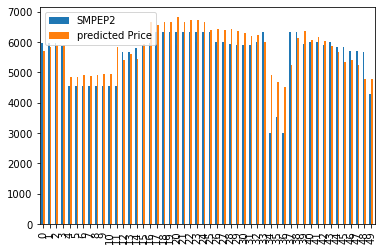

In [107]:
result[:50].plot.bar();

In [108]:
result

,SMPEP2,predicted Price
0,5965,5713.857525
1,5956,5851.375303
2,5956,5897.393504
3,5881,5899.677550
4,4542,4848.047086
...,...,...
2923,5369,6139.053128
2924,5092,6060.440117
2925,5092,6016.020403
2926,5092,6092.021515


In [109]:
(4931/5606.725357)

0.8794794975722582

In [111]:
rate = result['SMPEP2']/result['predicted Price']

E:\new\new_one\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


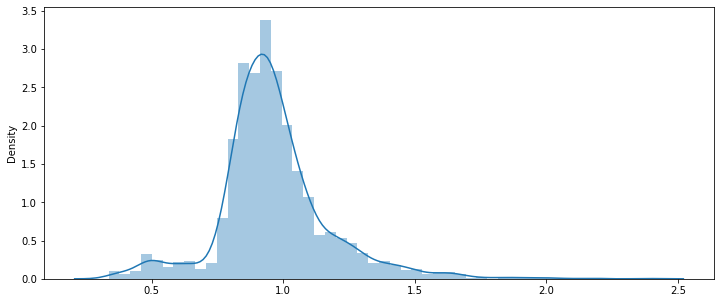

In [112]:
plt.figure(figsize = (12, 5))
sns.distplot(rate)
plt.show()

In [80]:
len(Price)

2928

1 mean the perfect predict
the most predicted percentage is 90% 

In [113]:
# define the important features
ideal_model.feature_importances_

array([0.08147731, 0.00153952, 0.00125949, 0.03940757, 0.08553438,
       0.04751183, 0.05184898, 0.        , 0.06798779, 0.04243302,
       0.09172742, 0.21847556, 0.0265429 , 0.02192239, 0.05525885,
       0.04095563, 0.12611735])

In [114]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=100):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

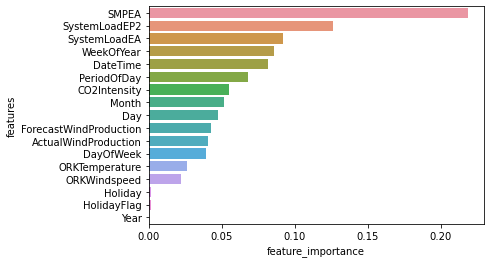

In [115]:
plot_features(X_train.columns, ideal_model.feature_importances_)

## RidgeRegressor

In [116]:
from sklearn.linear_model import Ridge

In [117]:
model2 = Ridge(alpha=0.01)
model2.fit(X_train, y_train)

Ridge(alpha=0.01)

In [118]:
show_scores(model2)

{'Training MAE': 1004.606532263912,
 'Valid MAE': 1769.4838690961478,
 'Training RMSLE': 0.26734283838386,
 'Valid RMSLE': 1.0920299053195557,
 'Trainig R^2': 0.19390773302962783,
 'valid R^2': 0.37108371508824567}

In [119]:
preds2 = model2.predict(df_test)

In [120]:
preds2, preds2.shape

(array([5699.20893218, 5769.96115212, 5739.86326288, ..., 6120.17116743,
        6152.42009835, 5993.27255237]),
 (2928,))

In [122]:
# create a dataFrame for the predicted data
df_preds2 = pd.DataFrame()
df_preds2["predicted Price2"] = preds2
df_preds2

,predicted Price2
0,5699.208932
1,5769.961152
2,5739.863263
3,5588.470822
4,5261.799292
...,...
2923,6147.694944
2924,6100.179608
2925,6120.171167
2926,6152.420098


In [123]:
#compare the real price and the predicted one
PriceCol  = ['SMPEP2']
Price = df11[PriceCol]
frames2 = [Price, df_preds2]
result = pd.concat(frames2, axis=1)
result

,SMPEP2,predicted Price2
0,5965,5699.208932
1,5956,5769.961152
2,5956,5739.863263
3,5881,5588.470822
4,4542,5261.799292
...,...,...
2923,5369,6147.694944
2924,5092,6100.179608
2925,5092,6120.171167
2926,5092,6152.420098


In [124]:
rate2 = result['SMPEP2']/result['predicted Price2']

In [125]:
rate2

0       1.046636
1       1.032243
2       1.037655
3       1.052345
4       0.863203
          ...   
2923    0.873335
2924    0.834730
2925    0.832003
2926    0.827642
2927    0.849619
Length: 2928, dtype: float64

E:\new\new_one\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


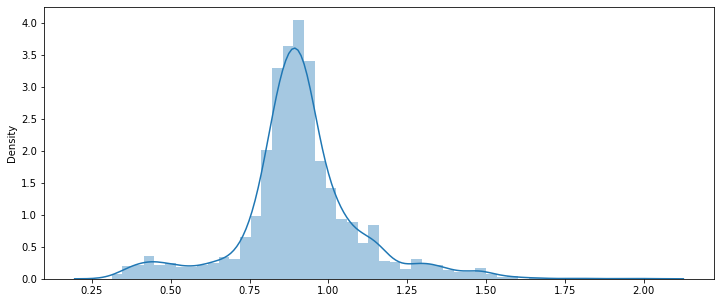

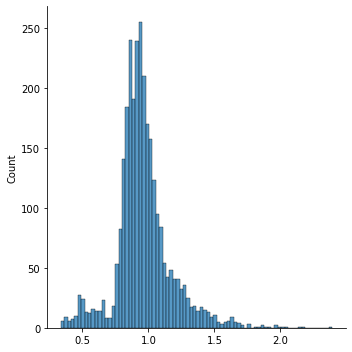

In [128]:
plt.figure(figsize = (12, 5))
sns.distplot(rate2)
sns.displot(rate)
plt.show()